##### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [79]:
from IPython.display import display
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [80]:
df=pd.read_csv('complaints.csv') #loading library

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##### EDA & Feature Scaling

In [64]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2022-08-11,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",IL,60431.0,NaN,NaN,Web,2022-08-11,Closed with explanation,Yes,NaN,5868234
1,2022-06-20,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,"Hi, I can't believe you guys are taking advant...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,AL,35211.0,NaN,Consent provided,Web,2022-06-20,Closed with non-monetary relief,Yes,NaN,5687460
2,2022-08-12,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,TX,78227.0,NaN,NaN,Web,2022-08-12,In progress,Yes,NaN,5873290
3,2022-08-10,Debt collection,Other debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,CONTRACT CALLERS INC,NY,10016.0,NaN,NaN,Web,2022-08-10,Closed with explanation,Yes,NaN,5864261
4,2022-08-19,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,33414.0,Servicemember,NaN,Web,2022-08-19,In progress,Yes,NaN,5895588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886022,2017-02-09,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt resulted from identity theft,I have disputed my debts several times with no...,NaN,Bonneville Billing and Collections,UT,84054.0,Servicemember,Consent provided,Web,2017-02-09,Closed with explanation,Yes,No,2334969
2886023,2015-04-29,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,My father died in XX/XX/XXXX. Left me his only...,NaN,"CITIBANK, N.A.",OK,74066.0,NaN,Consent provided,Web,2015-04-29,Closed with explanation,Yes,No,1352738
2886024,2017-01-16,Credit reporting,NaN,Incorrect information on credit report,Account status,My husband and I are in the middle of an FHA S...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,30215.0,NaN,Consent provided,Web,2017-01-16,Closed with explanation,Yes,No,2292586
2886025,2017-03-31,Credit reporting,NaN,Credit reporting company's investigation,No notice of investigation status/result,cfbp i would Like to file a complaint on Exper...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MN,55379.0,NaN,Consent provided,Web,2017-03-31,Closed with non-monetary relief,Yes,Yes,2412926


Text(0, 0.5, 'Product')

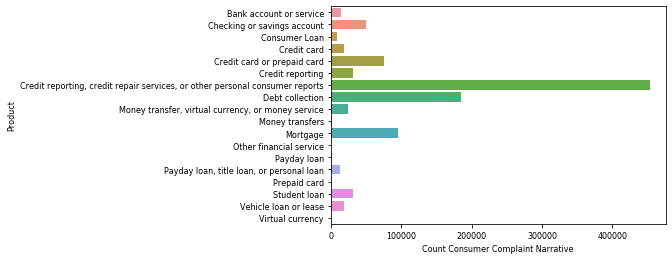

In [66]:
data = df[df['Consumer complaint narrative'].isnull()==False]

product_distribution = data.groupby('Product').count().reset_index()
plt.rcParams.update({'font.size':8})
sns.barplot(x=product_distribution['Consumer complaint narrative'], y=product_distribution['Product'])
plt.xlabel('Count Consumer Complaint Narrative')
plt.ylabel('Product')

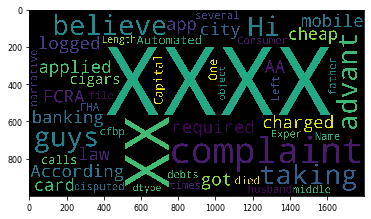

In [73]:
wordcloud = WordCloud(background_color='black',
                    stopwords = STOPWORDS, #After removing Stopwords
                    max_words = 100,
                    random_state = 101, 
                    width=1800, 
                    height=1000)
wordcloud.generate(str(data['Consumer complaint narrative']))
plt.imshow(wordcloud)

**Observation:** Need to do lot of preprocessing

In [67]:
df.head(3).T # Columns are shown in rows for easy reading
#pandas.DataFrame.T property is used to transpose index and columns of the data frame. 
#The property T is somehow related to method transpose(). 

,0,1,2
Date received,2022-08-11,2022-06-20,2022-08-12
Product,"Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o...","Credit reporting, credit repair services, or o..."
Sub-product,Credit reporting,Credit reporting,Credit reporting
Issue,Improper use of your report,Problem with a credit reporting company's inve...,Incorrect information on your report
Sub-issue,Reporting company used your report improperly,Was not notified of investigation status or re...,Information belongs to someone else
Consumer complaint narrative,NaN,"Hi, I can't believe you guys are taking advant...",NaN
Company public response,NaN,Company has responded to the consumer and the ...,NaN
Company,"EQUIFAX, INC.",Experian Information Solutions Inc.,Experian Information Solutions Inc.
State,IL,AL,TX
ZIP code,60431.0,35211.0,78227.0


**Observation:** The dataset contains features that are not necessary to solve our multi-classification problem. For this text classification problem, we are going to build another dataframe that contains ‘Product’ and ‘Consumer complaint narrative’ (renamed as 'Consumer_complaint').

In [68]:
# Create a new dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()

# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint'] 

df1.shape

(1025129, 2)

In [69]:
# Percentage of complaints with text as we're going to run Text based algo. (NLP)
total = df1['Consumer_complaint'].notnull().sum()
round((total/len(df)*100),1)

35.5

In [70]:
pd.DataFrame(df.Product.unique()).values

array([['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Debt collection'],
       ['Checking or savings account'],
       ['Mortgage'],
       ['Money transfer, virtual currency, or money service'],
       ['Vehicle loan or lease'],
       ['Credit card or prepaid card'],
       ['Payday loan, title loan, or personal loan'],
       ['Student loan'],
       ['Credit reporting'],
       ['Bank account or service'],
       ['Credit card'],
       ['Prepaid card'],
       ['Consumer Loan'],
       ['Payday loan'],
       ['Money transfers'],
       ['Other financial service'],
       ['Virtual currency']], dtype=object)

**Observation:** There are 18 different classes or categories (target). However; it is observed that some classes are contained in others. For instance, ‘Credit card’ and ‘Prepaid card’ are contained in ‘Credit card or prepaid card’ category.
We've to triubleshoot this else it will impact model performance

In [13]:
# Because the computation is time consuming (in terms of CPU), the data was sampled
df2 = df1.sample(10000, random_state=1).copy()

In [14]:
# Renaming categories
df2.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [15]:
pd.DataFrame(df2.Product.unique())

,0
0,Checking or savings account
1,"Credit reporting, repair, or other"
2,Debt collection
3,Student loan
4,Mortgage
5,"Payday loan, title loan, or personal loan"
6,Credit card or prepaid card
7,Vehicle loan or lease
8,Consumer Loan
9,Bank account or service


In [16]:
# Create a new column 'category_id' with encoded categories 
df2['category_id'] = df2['Product'].factorize()[0]
category_id_df = df2[['Product', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
df2.head()

,Product,Consumer_complaint,category_id
1301609,Checking or savings account,On XXXX XXXX I received an email alert from We...,0
1335822,"Credit reporting, repair, or other",XXXX is tryiing to commit an error saying tha...,1
2140764,"Credit reporting, repair, or other","XXXX XXXX, Equifax and XXXX are ignoring my r...",1
472657,"Credit reporting, repair, or other",I have no knowledge of the following inquiry C...,1
523919,Checking or savings account,On Wednesday XXXX XXXX around approximately @ ...,0


The bar chart below shows the number of complaints per category. It can be observed that The bar chart below shows the number of complaints per category. It can be observed that most of customer complaints are due to:

    .credit reporting, credit repair
    .debt collection
    .mortgage

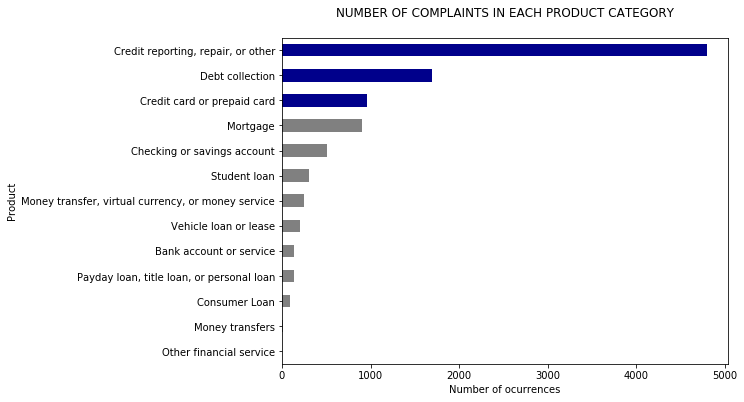

In [17]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

##### Text preprocessing

In [18]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 10000 complaints is represented by 27138 features (TF-IDF score of unigrams and bigrams)


In [19]:
# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Bank account or service:
  * Most Correlated Unigrams are: overdraft, promotion, citigold
  * Most Correlated Bigrams are: promotion xxxx, requirements promotion, xxxx checks

==> Checking or savings account:
  * Most Correlated Unigrams are: checking, bank, deposit
  * Most Correlated Bigrams are: savings account, direct deposit, checking account

==> Consumer Loan:
  * Most Correlated Unigrams are: chrysler, conn, ford
  * Most Correlated Bigrams are: contract states, chrysler capital, agreed late

==> Credit card or prepaid card:
  * Most Correlated Unigrams are: rewards, express, card
  * Most Correlated Bigrams are: card company, american express, credit card

==> Credit reporting, repair, or other:
  * Most Correlated Unigrams are: reporting, equifax, report
  * Most Correlated Bigrams are: 15 1681, 1681 section, credit report

==> Debt collection:
  * Most Correlated Unigrams are: collect, collection, debt
  * Most Correlated Bigrams are: debt collection, collection agency,

##### Model -Building

In [77]:
X = df2['Consumer_complaint'] # Collection of documents
y = df2['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state = 0)

In [21]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or

**Model Comparison**

In [22]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.8123,0.010438
LogisticRegression,0.7908,0.011105
MultinomialNB,0.6348,0.007743
RandomForestClassifier,0.4805,0.000500


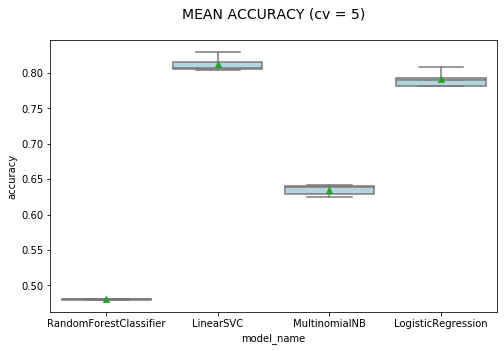

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

##### Model Evaluation

In [76]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features,labels,df2.index, test_size=0.25,random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

##### Confusion Matrix

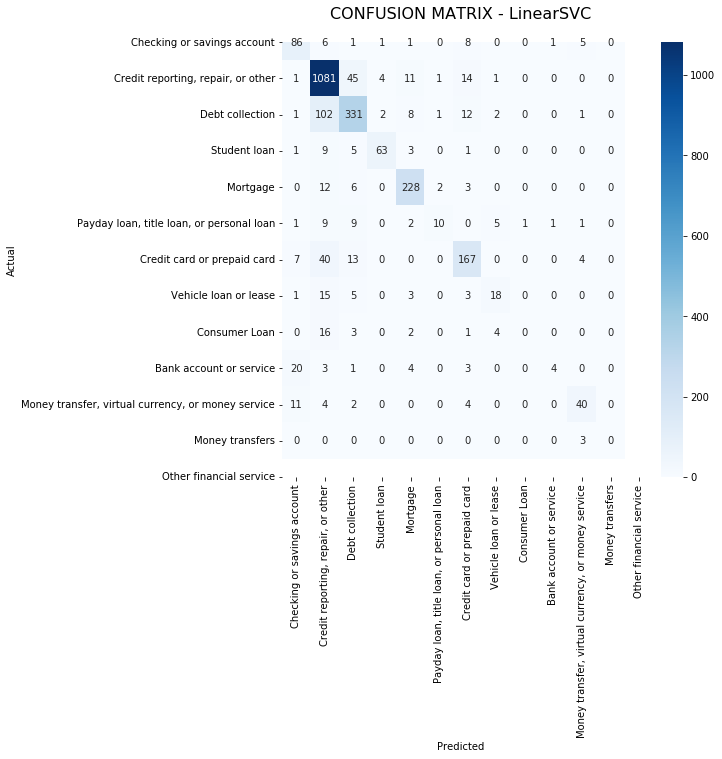

In [29]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

**Misclassified-Complaints**

In [30]:
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 20:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], 
                                                           id_to_category[predicted], 
                                                           conf_mat[actual, predicted]))
    
      display(df2.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 
                                                                'Consumer_complaint']])
      print('')

'Bank account or service' predicted as 'Checking or savings account' : 20 examples.


,Product,Consumer_complaint
1175916,Bank account or service,Extr a 20 checking. EXTRA20 BILL PAY BONUS. EX...
2859827,Bank account or service,I went to BMO bank XXXX XXXX XXXX XXXX WI. I g...
1799273,Bank account or service,I made transaction on my Rushcard that resulte...
2231257,Bank account or service,BAC sent out my bill pay on XX/XX/XXXX vs XX/X...
1829118,Bank account or service,On XXXX/XXXX/2016 - I was retained by Notary o...
2857078,Bank account or service,I am writing this complaint on behalf of my mo...
1814988,Bank account or service,Bank will not give me my funds from my direct ...
1733336,Bank account or service,I was charged an overdraft fee of {$35.00} dol...
57371,Bank account or service,I deposited a {$2000.00} check at my local Ban...
1102138,Bank account or service,I was unhappy with Chase Bank that someone did...


IndexError: index 12 is out of bounds for axis 0 with size 12

##### Model Correlated Terms

In [31]:
model.fit(features, labels)

N = 4
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("\n==> '{}':".format(Product))
  print("  * Top unigrams: %s" %(', '.join(unigrams)))
  print("  * Top bigrams: %s" %(', '.join(bigrams)))


==> 'Bank account or service':
  * Top unigrams: bank, checks, promotion, 2015
  * Top bigrams: xxxx checks, went bank, xxxx 2015, account month

==> 'Checking or savings account':
  * Top unigrams: bank, branch, funds, checking
  * Top bigrams: debit card, checking account, fraud charge, debt card

==> 'Consumer Loan':
  * Top unigrams: ford, conn, wanted, car
  * Top bigrams: agreed late, payment xxxx, went credit, santander consumer

==> 'Credit card or prepaid card':
  * Top unigrams: card, capital, netspend, rewards
  * Top bigrams: credit card, american express, late fees, auto pay

==> 'Credit reporting, repair, or other':
  * Top unigrams: equifax, experian, transunion, report
  * Top bigrams: account xxxx, xxxx xxxx, knowledge account, date xx

==> 'Debt collection':
  * Top unigrams: debt, collection, owe, midland
  * Top bigrams: report heard, late xx, remove credit, credit systems

==> 'Money transfer, virtual currency, or money service':
  * Top unigrams: coinbase, paypal

##### Predictions

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

##### Testing

In [55]:
new_complaint = """I have been enrolled back at XXXX XXXX University in the XX/XX/XXXX. Recently, i have been harassed by \
Navient for the last month. I have faxed in paperwork providing them with everything they needed. And yet I am still getting \
phone calls for payments. Furthermore, Navient is now reporting to the credit bureaus that I am late. At this point, \
Navient needs to get their act together to avoid me taking further action. I have been enrolled the entire time and my \
deferment should be valid with my planned graduation date being the XX/XX/XXXX."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Student loan']


In [56]:
new_complaint_2 = """Equifax exposed my personal information without my consent, as part of their recent data breach. \
In addition, they dragged their feet in the announcement of the report, and even allowed their upper management to sell \
off stock before the announcement."""
print(model.predict(fitted_vectorizer.transform([new_complaint_2])))

['Credit reporting, repair, or other']


**Our model correctly classfying the complaints**